In [57]:
!pip install folium

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached MarkupSafe-3.0.2-cp313-cp313-win_amd64.whl.metadata (4.1 kB)
  Using cached charset_normalizer-3.4.1-cp313-cp313-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.4.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 3.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/12.6 MB 2.0 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/12.6 MB 1.3 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/12.6 MB 1.5 MB/s eta 0:00:08
   ---- ----------------------------------- 1.6/12.6 MB 1.5 MB/s eta 0:00


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
python -m pip install --upgrade pip

SyntaxError: invalid syntax (629497118.py, line 1)

In [73]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
df = pd.read_csv('my_data.csv')

In [65]:
df.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     228798151  05/27/2021   21:30:00  QUEENS               NaN       105   
1     137471050  06/27/2014   17:40:00   BRONX               NaN        40   
2     147998800  11/21/2015   03:56:00  QUEENS               NaN       108   
3     146837977  10/09/2015   18:30:00   BRONX               NaN        44   
4      58921844  02/19/2009   22:58:00   BRONX               NaN        47   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
0                0.0                NaN           NaN   
1                0.0                NaN           NaN   
2                0.0                NaN           NaN   
3                0.0                NaN           NaN   
4                0.0                NaN           NaN   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0                    False  ...      NaN       NaN         18-24       M   
1                    False  ...      NaN       NaN         18-24       M   
2                     True  ...      NaN       NaN         25-44       M   
3                    False  ...      NaN       NaN           <18       M   
4                     True  ...        M     BLACK         45-64       M   

         VIC_RACE    X_COORD_CD     Y_COORD_CD   Latitude  Longitude  \
0           BLACK  1.058925e+06  180924.000000  40.662965 -73.730839   
1           BLACK  1.005028e+06  234516.000000  40.810352 -73.924942   
2           WHITE  1.007668e+06  209836.531250  40.742607 -73.915492   
3  WHITE HISPANIC  1.006537e+06  244511.140625  40.837782 -73.919457   
4           BLACK  1.024922e+06  262189.406250  40.886238 -73.852910   

                                         Lon_Lat  
0  POINT (-73.73083868899994 40.662964620000025)  
1   POINT (-73.92494232599995 40.81035186300006)  
2   POINT (-73.91549174199997 40.74260663300004)  
3   POINT (-73.91945661499994 40.83778200300003)  
4   POINT (-73.85290950899997 40.88623791800006)  

[5 rows x 21 columns]

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [67]:
df.describe()

INCIDENT_KEY      PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  2.731200e+04  27312.000000       27310.000000  2.731200e+04   
mean   1.208605e+08     65.635362           0.326913  1.009449e+06   
std    7.341286e+07     27.305705           0.737743  1.837783e+04   
min    9.953245e+06      1.000000           0.000000  9.149281e+05   
25%    6.386088e+07     44.000000           0.000000  1.000029e+06   
50%    9.037222e+07     68.000000           0.000000  1.007731e+06   
75%    1.888102e+08     81.000000           0.000000  1.016838e+06   
max    2.611902e+08    123.000000           2.000000  1.066815e+06   

          Y_COORD_CD      Latitude     Longitude  
count   27312.000000  27302.000000  27302.000000  
mean   208127.401608     40.737892    -73.909051  
std     31886.377757      0.087525      0.066272  
min    125756.718750     40.511586    -74.249303  
25%    182834.335938     40.668481    -73.943027  
50%    194486.570312     40.700318    -73.915221  
75%    239518.468750     40.824067    -73.882330  
max    271127.687500     40.910818    -73.702046

In [68]:
df = df.dropna(subset=['Latitude', 'Longitude', 'OCCUR_DATE', 'OCCUR_TIME'])

In [69]:
df['OCCUR_DATE'] = pd.to_datetime(df['OCCUR_DATE'])
df['hour'] = pd.to_datetime(df['OCCUR_TIME'], format='%H:%M:%S').dt.hour
df['day_of_week'] = df['OCCUR_DATE'].dt.dayofweek  # Monday=0, Sunday=6

In [70]:
# Feature selection
features = df[['Latitude', 'Longitude', 'hour', 'day_of_week', 'JURISDICTION_CODE']].copy()

# One-hot encode demographic features (can include NaNs)
demo_features = pd.get_dummies(df[['STATISTICAL_MURDER_FLAG', 'VIC_AGE_GROUP']], drop_first=True)

# Combine all features
combined_features = pd.concat([features, demo_features], axis=1)

# Impute any remaining NaNs with mean (or median)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(combined_features)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

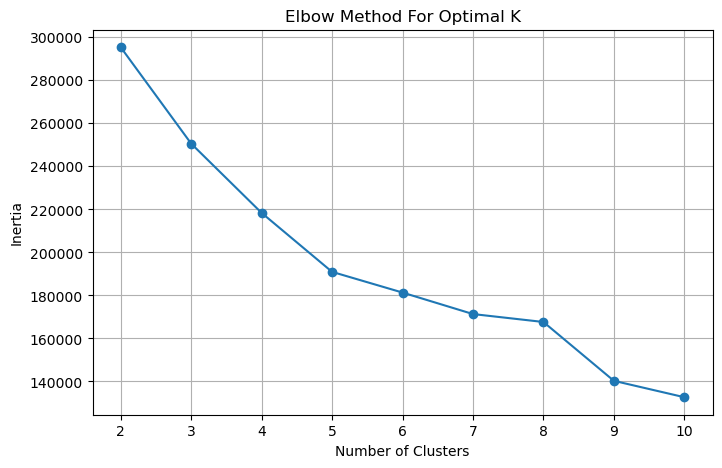

In [74]:
# Choose optimal K (optional elbow method)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(2,11), inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Fit final model
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


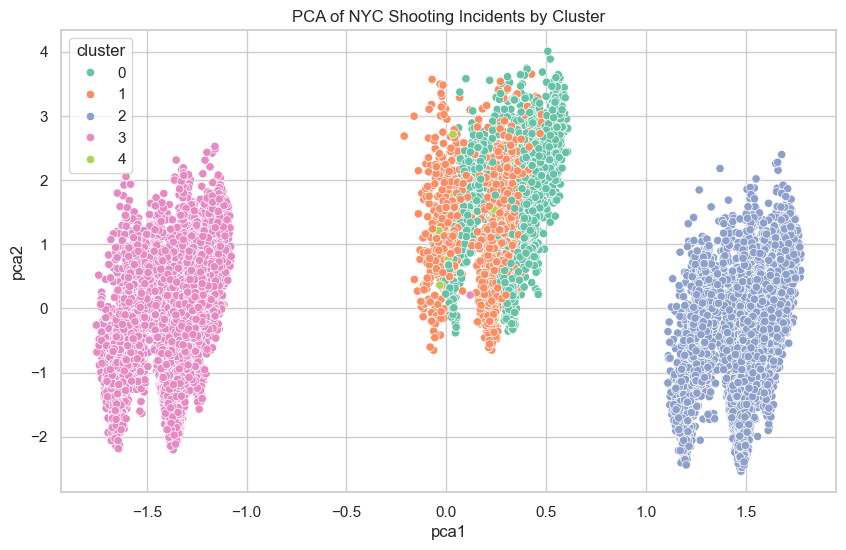

In [75]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:,0]
df['pca2'] = components[:,1]

sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('PCA of NYC Shooting Incidents by Cluster')
plt.show()


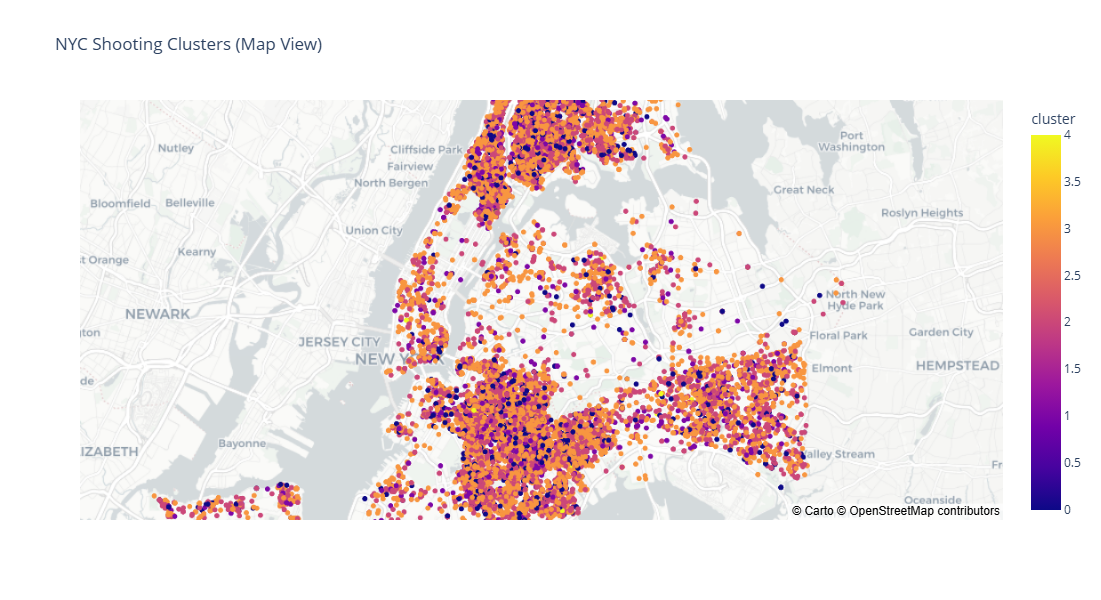

In [77]:
fig = px.scatter_mapbox(
    df,
    lat="Latitude",
    lon="Longitude",
    color="cluster",
    zoom=10,
    height=600,
    mapbox_style="carto-positron",
    title="NYC Shooting Clusters (Map View)"
)
fig.show()


In [78]:
df.to_csv("nyc_shootings_clustered.csv", index=False)
